**Understanding and Loading the Dataset**

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Salary_dataset.csv")
print(df)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [30]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [31]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [9]:
YearsExperience = df[['YearsExperience']]
Salary = df['Salary']

print("Input variable (YearsExperience):")
print(YearsExperience.head())
print("\nOutput variable (Salary):")
print(Salary.head())

Input variable (YearsExperience):
   YearsExperience
0              1.2
1              1.4
2              1.6
3              2.1
4              2.3

Output variable (Salary):
0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64


**Data Preprocessing using NumPy**

In [10]:
X = df[['YearsExperience']]
y = df['Salary']

print("Independent variable (X):")
print(X.head())
print("\nDependent variable (y):")
print(y.head())

Independent variable (X):
   YearsExperience
0              1.2
1              1.4
2              1.6
3              2.1
4              2.3

Dependent variable (y):
0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64


In [12]:
X_np = X.values
y_np = y.values

print("X as NumPy array (first 5 elements):\n", X_np[:5])
print("Shape of X_np:", X_np.shape)

print("\ny as NumPy array (first 5 elements):\n", y_np[:5])
print("Shape of y_np:", y_np.shape)

X as NumPy array (first 5 elements):
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
Shape of X_np: (30, 1)

y as NumPy array (first 5 elements):
 [39344. 46206. 37732. 43526. 39892.]
Shape of y_np: (30,)


In [13]:
y_np_reshaped = y_np.reshape(-1, 1)

print("X_np shape after conversion:", X_np.shape)
print("y_np shape after reshaping:", y_np_reshaped.shape)
print("\ny_np_reshaped (first 5 elements):\n", y_np_reshaped[:5])

X_np shape after conversion: (30, 1)
y_np shape after reshaping: (30, 1)

y_np_reshaped (first 5 elements):
 [[39344.]
 [46206.]
 [37732.]
 [43526.]
 [39892.]]


**Implementing Linear Regression Model from Scratch**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import mean_squared_error

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("X_train shape:",X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)


**Linear Regression**

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]


**Prediction & Evaluation**

In [39]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.855908394


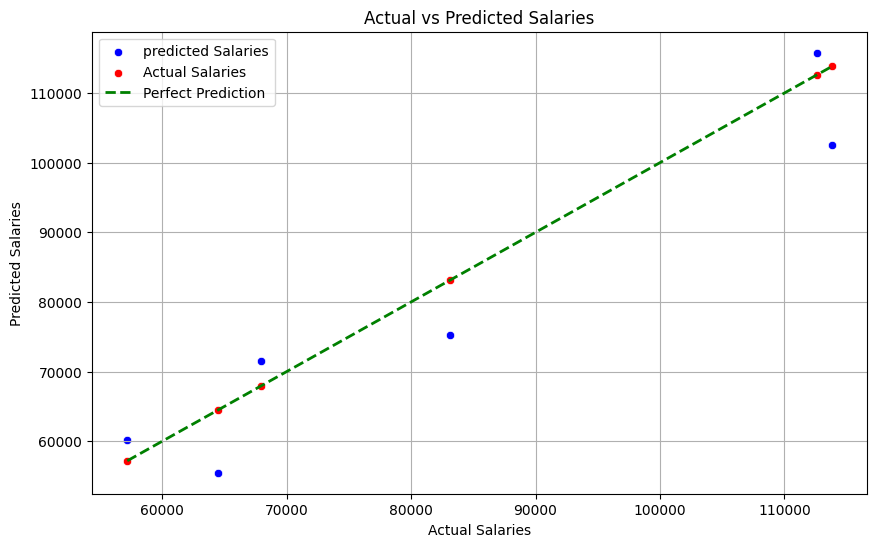

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test.values.flatten(),y=y_pred.flatten(),color="blue",label="predicted Salaries")
sns.scatterplot(x=y_test.values.flatten(),y=y_test.values.flatten(),color="red",label="Actual Salaries")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="green",linestyle="--",linewidth=2,label="Perfect Prediction")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")
plt.legend()
plt.grid()
plt.show()